In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip /content/drive/MyDrive/Machine_Learning_Assessments/Machine_Learning_Assessment_1/blood_cell_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_8167.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_8283.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_8324.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_8379.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_8577.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_8587.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_8655.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_8701.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_872.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_8864.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_8931.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_8989.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_899.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_9320.jpeg  
  inflating: blood_cell_data/TRAIN/LYMPHOCYTE/_9_9338.jpeg  
  inflating: blood_cell_data/TRAIN/L

In [120]:
!sudo pip3 install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
tf.print(tf. __version__) 


2.9.2


In [122]:
train_path = '/content/blood_cell_data/TRAIN'
test_path = '/content/blood_cell_data/TEST'

In [123]:
data_set = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,rescale=1./255.0,validation_split=0.20)

In [124]:
from traitlets.traitlets import validate
train = data_set.flow_from_directory(train_path,
                    target_size = (128, 128),
                    subset='training',
                    classes=['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],
                    batch_size = 32,
                    class_mode = 'categorical')

validation = data_set.flow_from_directory(train_path,
                    target_size = (128, 128),
                    subset='validation',
                    classes=['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],
                    batch_size = 32,
                    class_mode = 'categorical')
test = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,rescale=1./255.0).flow_from_directory(test_path,
                    target_size = (128, 128),
                    classes=['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],
                    batch_size = 32,
                    class_mode = 'categorical')


Found 7968 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
Found 71 images belonging to 4 classes.


In [125]:
# trainclasses = train.classes
# print(classes)

In [29]:
# test_classes = test.classes
# print(test_classes)

In [119]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(classes[labels[i]])
#     plt.axis("off")

In [145]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32, 4)


In [ ]:
## Creating the Model

In [159]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

In [172]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(128,128,3)), 
    tf.keras.layers.MaxPooling2D((2,2), strides=2),

    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [173]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [174]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 16, 16, 64)      

In [175]:
epochs= 25
history=model.fit(
  train,
  validation_data= validation,
  epochs=epochs,
  callbacks=callback
)

Epoch 1/25
249/249 [==============================] - 20s 78ms/step - loss: 1.3868 - accuracy: 0.2442 - val_loss: 1.3803 - val_accuracy: 0.2896
Epoch 2/25
249/249 [==============================] - 19s 75ms/step - loss: 1.1251 - accuracy: 0.4750 - val_loss: 0.9580 - val_accuracy: 0.5686
Epoch 3/25
249/249 [==============================] - 18s 73ms/step - loss: 0.7223 - accuracy: 0.6691 - val_loss: 0.4890 - val_accuracy: 0.7753
Epoch 4/25
249/249 [==============================] - 18s 72ms/step - loss: 0.4184 - accuracy: 0.8205 - val_loss: 0.3248 - val_accuracy: 0.8703
Epoch 5/25
249/249 [==============================] - 18s 71ms/step - loss: 0.2913 - accuracy: 0.8805 - val_loss: 0.4428 - val_accuracy: 0.8260
Epoch 6/25
249/249 [==============================] - 18s 72ms/step - loss: 0.2297 - accuracy: 0.9057 - val_loss: 0.1898 - val_accuracy: 0.9271
Epoch 7/25
249/249 [==============================] - 18s 72ms/step - loss: 0.1826 - accuracy: 0.9277 - val_loss: 0.1757 - val_accuracy:

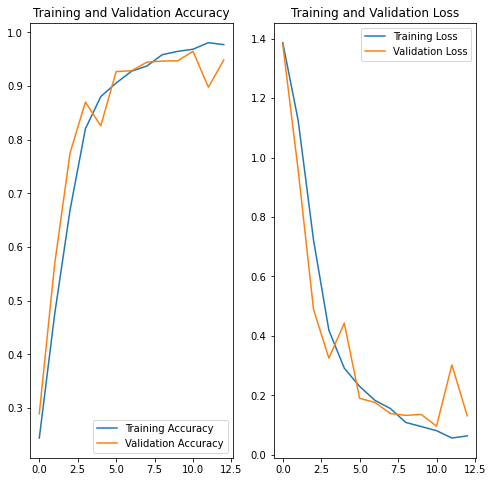

In [176]:
n_epochs = len(history.history['loss'])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(n_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [177]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [217]:
preds = model.predict(test)
preds = np.argmax(preds,axis=1)
preds

3/3 [==============================] - 0s 35ms/step


array([0, 0, 0, 3, 0, 0, 1, 3, 3, 3, 3, 0, 3, 3, 0, 0, 2, 3, 0, 0, 0, 3,
       3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 0, 0, 1, 2,
       1, 3, 3, 3, 3])

In [218]:
accuracy = accuracy_score(test.classes,preds)
print(accuracy)

0.5492957746478874


In [170]:
cm = confusion_matrix(test.classes, preds) 
print(cm)

[[ 6  1  0  6]
 [ 2  1  0  3]
 [ 0  0  0  4]
 [ 9  4  3 32]]


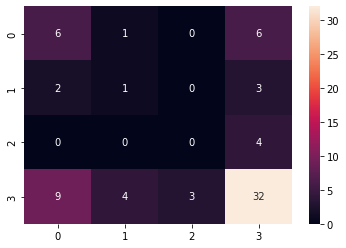

In [171]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [221]:
cr = classification_report(test.classes, preds)
print(cr)

              precision    recall  f1-score   support

           0       0.32      0.46      0.37        13
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.77      0.69      0.73        48

    accuracy                           0.55        71
   macro avg       0.27      0.29      0.28        71
weighted avg       0.58      0.55      0.56        71

